<a href="https://colab.research.google.com/github/ylonaSAINTEROSE/test/blob/main/ML_TP4_VALENSI_MALLET_GUY_SAINTE_ROSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
import os
import zipfile
from PIL import Image
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
# Importation de la bibliothèque d'authentification Google
from google.colab import drive

# Montage de votre compte Google Drive
drive.mount("/content/drive/")


# Vérification de l'accès au dossier
!ls drive/MyDrive


Mounted at /content/drive/
 085267D6-FAEF-4F72-9465-0B1A16A9A6E8.jpeg  'image (2).jpg'
 1.pdf					    'image (3).jpg'
 22.pdf					    'image (4).jpg'
 2.pdf					    'image (5).jpg'
'3 (1).pdf'				    'image (6).jpg'
 3.pdf					    'image (7).jpg'
 4DBBF729-CE7E-4B5A-A489-81C98070C937.jpeg  'image (8).jpg'
 4.pdf					    'image (9).jpg'
 864BA090-0CD3-43E6-A1A7-CF8290732147.jpeg   image.jpg
 AF8572E0-4C79-4780-A04D-C67D4DEFCF64.jpeg   IMG_0596.MOV
 cats_and_dogs				    'lab1 (1).gdoc'
 Classroom				    'lab1 (1).pdf'
'Colab Notebooks'			     lab1.gdoc
'Document sans titre.gdoc'		     lab1.pdf
'Formulaire sans titre (1).gform'	    'part 2.xlsx'
'Formulaire sans titre (2).gform'	    'project 0002.pdf'
'Formulaire sans titre (3).gform'	    'PROJET BIOMECANIQUE.gdoc'
'Formulaire sans titre.gform'		    'Reddit Interaction.gdoc'
'Formulaire sans titre (réponses).gsheet'   'Reflection form (1).gdoc'
 hadoop-log4j.log			    'Reflection form (2).gdoc'
'Hobby 1.gslides'			    'Reflection form.gd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls

drive  sample_data


In [8]:
path = '/content/drive/MyDrive/cats_and_dogs'

In [9]:
!ls /content/drive/MyDrive | grep cats

cats_and_dogs


Taille de l'image :  (615, 769)
Mode de l'image :  RGB


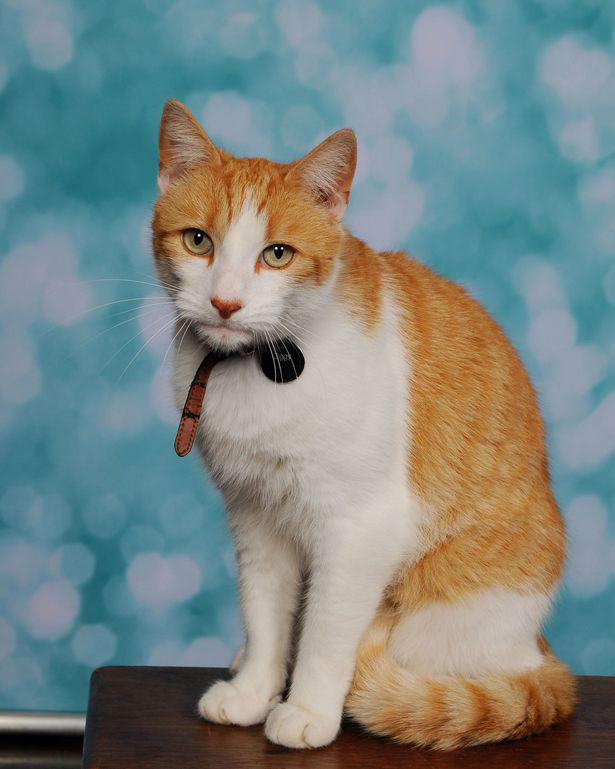

In [10]:
# Chemin d'accès au fichier image sur le disque
chemin_image = '/content/drive/MyDrive/cats_and_dogs/test/cats/cat_1.jpg'

# Ouvrir l'image
image = Image.open(chemin_image)

# Afficher la taille de l'image
print("Taille de l'image : ", image.size)

# Afficher le mode de l'image
print("Mode de l'image : ", image.mode)

# Afficher l'image
image.show()

In [11]:
train_path = '/content/drive/MyDrive/cats_and_dogs/train/'
test_path = '/content/drive/MyDrive/cats_and_dogs/test/'

batch_size = 32
img_height = 150
img_width = 150

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [13]:
# Create a sequential model
model = keras.Sequential()
IMG_HEIGHT = 150
IMG_WIDTH = 150
# Add convolutional layer with 32 filters, 3x3 kernel size, and relu activation
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(keras.layers.MaxPooling2D((3, 3)))
model.add(keras.layers.Dropout(0.25))

# Add another convolutional layer with 64 filters, 3x3 kernel size, and relu activation
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3, 3)))
model.add(keras.layers.Dropout(0.25))

# Add another convolutional layer with 128 filters, 3x3 kernel size, and relu activation
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3, 3)))
model.add(keras.layers.Dropout(0.25))

# Add flatten layer
model.add(keras.layers.Flatten())

# Add dense layer with 512 units and relu activation
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# Add output layer with 1 unit and sigmoid activation (binary classification)
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and RMSprop optimizer
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
import matplotlib.pyplot as plt
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator))

Epoch 1/10
18/18 [==============================] - 130s 7s/step - loss: 0.7151 - accuracy: 0.5206 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 31s 2s/step - loss: 0.6913 - accuracy: 0.5278 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/10
18/18 [==============================] - 33s 2s/step - loss: 0.6909 - accuracy: 0.5206 - val_loss: 0.6932 - val_accuracy: 0.5071
Epoch 4/10
18/18 [==============================] - 33s 2s/step - loss: 0.6914 - accuracy: 0.5153 - val_loss: 0.6902 - val_accuracy: 0.6143
Epoch 5/10
18/18 [==============================] - 31s 2s/step - loss: 0.6855 - accuracy: 0.5224 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 31s 2s/step - loss: 0.6888 - accuracy: 0.5566 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 33s 2s/step - loss: 0.6763 - accuracy: 0.6014 - val_loss: 0.6775 - val_accuracy: 0.6214
Epoch 8/10
18/18 [=

In [24]:


# Define paths to train and validation data directories
train_dir = '/content/drive/MyDrive/cats_and_dogs/train/'
val_dir = '/content/drive/MyDrive/cats_and_dogs/test/'
#val_dir = 'validation'


# Set image size and batch size
img_size = (224, 224)
batch_size = 32

# Preprocess input images for MobileNet
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create train and validation data generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size)

# Load MobileNet model with pre-trained weights and without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers to the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(2, activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 5
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 50s 3s/step - loss: 0.3452 - accuracy: 0.8384 - val_loss: 0.1481 - val_accuracy: 0.9357
Epoch 2/10
18/18 [==============================] - 45s 3s/step - loss: 0.0701 - accuracy: 0.9749 - val_loss: 0.0714 - val_accuracy: 0.9643
Epoch 3/10
18/18 [==============================] - 45s 3s/step - loss: 0.0365 - accuracy: 0.9838 - val_loss: 0.1034 - val_accuracy: 0.9500
Epoch 4/10
18/18 [==============================] - 45s 2s/step - loss: 0.0131 - accuracy: 0.9928 - val_loss: 0.1028 - val_accuracy: 0.9500
Epoch 5/10
18/18 [==============================] - 45s 3s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1285 - val_accuracy: 0.9429
Epoch 6/10
18/18 [==============================] - 45s 2s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9429
Epoch 7/10
18/18 [==============================] - 42s 2s/step - loss: 7.4937

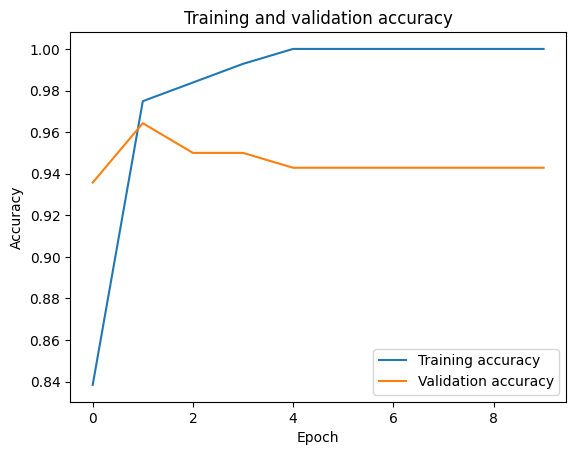

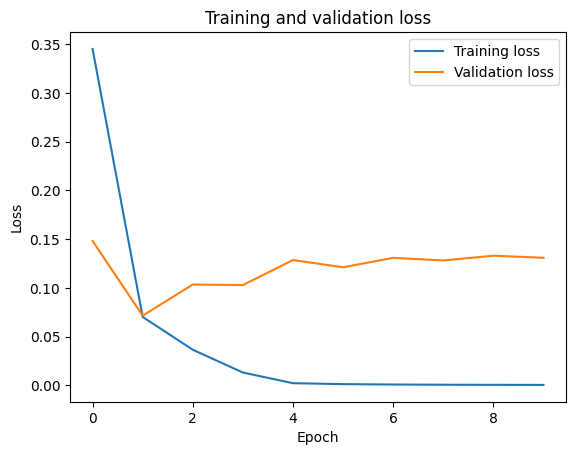

In [25]:
import matplotlib.pyplot as plt

# Get training and validation accuracy and loss from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


5/5 [==============================] - 9s 1s/step


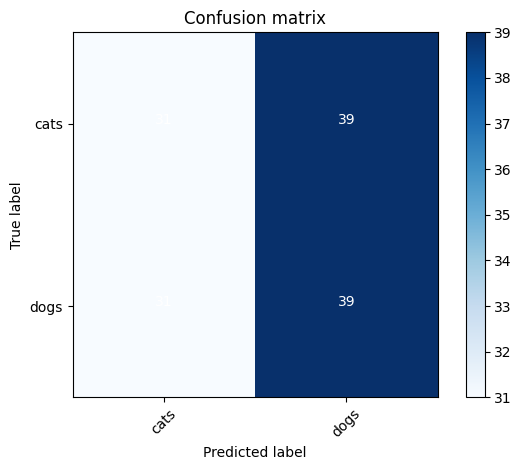

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the classes of the validation set
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true classes of the validation set
y_true = val_generator.classes

# Get the class labels
class_labels = list(val_generator.class_indices.keys())

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Display the counts of each class within the heatmap
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [27]:
from sklearn.metrics import classification_report

# Predict the classes of the test set
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true classes of the test set
y_true = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


5/5 [==============================] - 8s 1s/step
              precision    recall  f1-score   support

        cats       0.56      0.47      0.51        70
        dogs       0.54      0.63      0.58        70

    accuracy                           0.55       140
   macro avg       0.55      0.55      0.55       140
weighted avg       0.55      0.55      0.55       140



In [29]:
from keras.applications.nasnet import NASNetMobile


# Define paths to train and validation data directories
train_dir = '/content/drive/MyDrive/cats_and_dogs/train/'
val_dir = '/content/drive/MyDrive/cats_and_dogs/test/'
#val_dir = 'validation'


# Set image size and batch size
img_size = (224, 224)
batch_size = 32

# Preprocess input images for NASNetMobile
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create train and validation data generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size)

# Load MobileNet model with pre-trained weights and without the top layer
base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers to the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(2, activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 5
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
19993432/19993432 [==============================] - 0s 0us/step
Epoch 1/10
18/18 [==============================] - 103s 5s/step - loss: 0.1809 - accuracy: 0.9354 - val_loss: 0.0669 - val_accuracy: 0.9786
Epoch 2/10
18/18 [==============================] - 68s 4s/step - loss: 0.0769 - accuracy: 0.9731 - val_loss: 0.2094 - val_accuracy: 0.9286
Epoch 3/10
18/18 [==============================] - 76s 4s/step - loss: 0.0305 - accuracy: 0.9838 - val_loss: 0.0416 - val_accuracy: 0.9786
Epoch 4/10
18/18 [==============================] - 76s 4s/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.2097 - val_accuracy: 0.9429
Epoch 5/10
18/18 [==============================] - 69s 4s/step - loss: 0.0038 - accuracy: 0.9982 - val_loss: 0.1419 - val_accuracy: 0.9429
Epoch 6/10
18/18 [==============================] - 77s 4s/step - loss: 7.5955e-04 - accuracy: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.9429
Epoch 7/

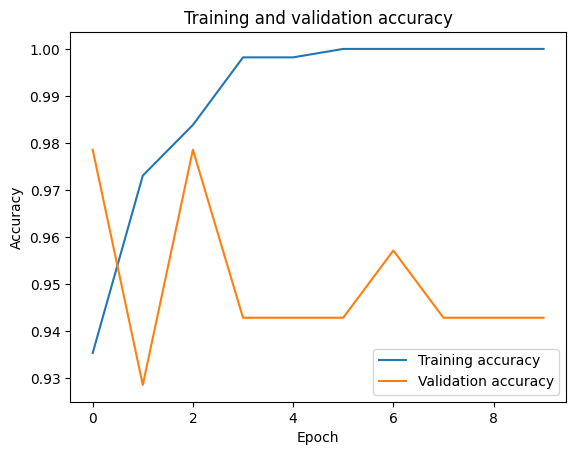

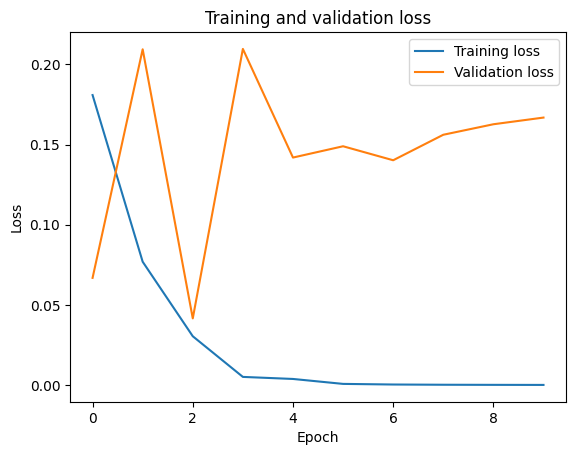

In [35]:
import matplotlib.pyplot as plt

# Get training and validation accuracy and loss from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


5/5 [==============================] - 85s 15s/step


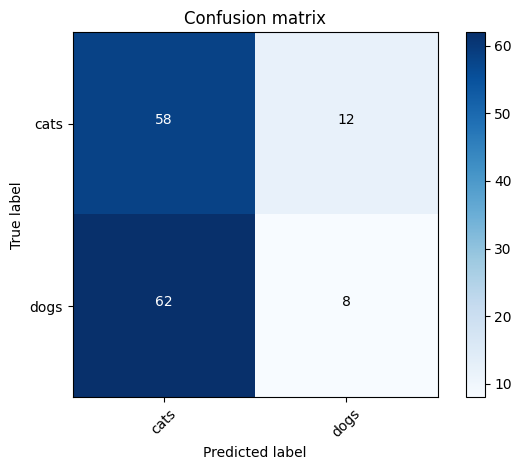

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the classes of the validation set
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true classes of the validation set
y_true = val_generator.classes

# Get the class labels
class_labels = list(val_generator.class_indices.keys())

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Display the counts of each class within the heatmap
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [38]:
from sklearn.metrics import classification_report

# Predict the classes of the test set
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true classes of the test set
y_true = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


9/9 [==============================] - 148s 16s/step
              precision    recall  f1-score   support

        cats       0.98      0.74      0.85        70
        dogs       0.79      0.99      0.88        70

    accuracy                           0.86       140
   macro avg       0.89      0.86      0.86       140
weighted avg       0.89      0.86      0.86       140

